# ¡Hola!  

Mi nombre es Maria Efimova, soy code reviewer de Practicum y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

¡Empecemos!

# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [60]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


## Cargar los datos

In [61]:
# Carga los archivos de datos en diferentes DataFrames
calls_data = pd.read_csv('/datasets/megaline_calls.csv')
internet_data = pd.read_csv('/datasets/megaline_internet.csv')
messages_data = pd.read_csv('/datasets/megaline_messages.csv')
plan_data = pd.read_csv('/datasets/megaline_plans.csv')
users_matrix = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en muchas tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones necesarias a cada tabla.]

## Planes

In [62]:
plan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [63]:
plan_data.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Corregir los datos

- Observo que los datos de mb_per_month_included están descritos en Mb cuando sabemos que Megaline redondea el uso de Megabytes a Gigabytes, por el momento mantendré los datos como están, sin embargo, asumo que más adelante requerirán ser homegeenizados para el cálculo del costo de servicio total en Gigabytes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Buen inicio!

## Enriquecer los datos

- No veo necesidad de adicionar algo más a los datos descriptivos del plan de telefonía.

## Usuarios

In [64]:
users_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [65]:
users_matrix.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


### Corregir datos

- Voy a corregir las fechas de registro y de fin de la suscripción para que tengan formato datetime, así mismo voy especificar en los datos Nan que la fecha de fin no ha terminado con la leyenda "In Use" 

In [66]:
users_matrix['reg_date'] = pd.to_datetime(users_matrix['reg_date'], format = '%Y-%m-%d')
users_matrix['churn_date'] = pd.to_datetime(users_matrix['churn_date'], format = '%Y-%m-%d')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Muy bien que no olvides sobre usar format

In [67]:
users_matrix['churn_date'] = users_matrix['churn_date'].fillna(value = 'In Use')

In [68]:
users_matrix.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,In Use
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,In Use
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,In Use
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,In Use
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,In Use


In [69]:
users_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer datos

- No veo necesidad de enriquecer esta sección de los datos.

## Llamadas

In [70]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [71]:
calls_data.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


### Corregir datos

- Cambiaré la columna de fechas de llamadas call_date a formato datetime.

In [72]:
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'], format = '%Y-%m-%d')

###redondeo de duración en minutos desde la creación de la tabla###

### Enriquecer datos

- Añadiré una columna para indicar el mes en el que fue realizada la llamada, a fin de utilizar este dato en futuras operaciones de cálculos mensuales.

In [73]:
calls_data['month'] = calls_data['call_date'].dt.month

## Mensajes

In [74]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [75]:
messages_data.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Corregir datos

- Cambiaré la columna de fechas de mensajes message_date a formato datetime.

In [76]:
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format = '%Y-%m-%d')

### Enriquecer datos

- Al igual que con las llamadas, añadiré una columna para indicar el mes en el que fueron realizados los mensajes, a fin de utilizar este dato en futuras operaciones de cálculos mensuales.

In [77]:
messages_data['month'] = messages_data['message_date'].dt.month

## Internet

In [78]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [79]:
internet_data.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Corregir datos

- Cambiaré la columna de fechas de sesión en internet session_date a formato datetime.

In [80]:
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'], format = '%Y-%m-%d')

### Enriquecer datos

- De igual forma, añadiré una columna para indicar el mes en el que fueron iniciadas las sesiones de internet para su uso posterior en operaciones de cálculos mensuales.

In [81]:
internet_data['month'] = internet_data['session_date'].dt.month

## Estudiar las condiciones del plan

In [82]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
plan_data.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


- El plan surf incluye 50 mensajes, 15360 Mb (15Gb) y 500 minutos por un costo total base de 20USD. Cualquier consumo por encima de estos valores se cobra 10USD por cada Gb, 0.03USD por cada mensaje y 0.03USD por cada minuto adicionales.
- El plan ultimate incluye 1000 mensajes, 30720 Mb (30Gb), 3000 minutos por un costo base de 70USD. Cualquier consumo por encima de estos valores se cobra 7USD por cada Gb, 0.01USD por cada mensaje y 0.01USD por cada minuto adicionales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui correcto!

## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario por periodo para poder tener solo un registro por usuario por periodo. Esto facilitará mucho su posterior análisis.]

In [83]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.
calls_by_user_per_month = calls_data.pivot_table(index=['user_id','month'],values = 'id',aggfunc='count')
calls_by_user_per_month.columns=['calls_count']

In [84]:
calls_by_user_per_month

calls_count
user_id month             
1000    12              16
1001    8               27
        9               49
        10              65
        11              64
...                    ...
1498    12              39
1499    9               41
        10              53
        11              45
        12              65

[2258 rows x 1 columns]

In [85]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.
minutes_by_user_per_month = calls_data.pivot_table(index=['user_id','month'],values = 'duration',aggfunc='sum')
minutes_by_user_per_month.columns=['calls_minutes']
minutes_by_user_per_month['calls_minutes'] = np.ceil(minutes_by_user_per_month['calls_minutes'])

In [86]:
minutes_by_user_per_month

calls_minutes
user_id month               
1000    12             117.0
1001    8              172.0
        9              298.0
        10             375.0
        11             405.0
...                      ...
1498    12             325.0
1499    9              331.0
        10             364.0
        11             289.0
        12             469.0

[2258 rows x 1 columns]

In [87]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.
messages_by_user_per_month = messages_data.pivot_table(index=['user_id', 'month'] ,values = 'id',aggfunc='count')
messages_by_user_per_month.columns=['messages']

In [88]:
messages_by_user_per_month

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36
...                 ...
1496    9            21
        10           18
        11           13
        12           11
1497    12           50

[1806 rows x 1 columns]

In [89]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
internet_by_user_per_month = internet_data.pivot_table(index=['user_id', 'month'],values = 'mb_used',aggfunc='sum')
internet_by_user_per_month['mb_used'] = internet_by_user_per_month['mb_used'] / 1024
internet_by_user_per_month.columns=['gb_used']
internet_by_user_per_month['gb_used'] = np.ceil(internet_by_user_per_month['gb_used'])

In [90]:
internet_by_user_per_month

gb_used
user_id month         
1000    12         2.0
1001    8          7.0
        9         14.0
        10        22.0
        11        19.0
...                ...
1498    12        23.0
1499    9         13.0
        10        20.0
        11        17.0
        12        22.0

[2277 rows x 1 columns]

In [91]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
combined_data_table = calls_by_user_per_month.join(minutes_by_user_per_month).join(messages_by_user_per_month).join(internet_by_user_per_month)

In [92]:
combined_data_table

calls_count  calls_minutes  messages  gb_used
user_id month                                               
1000    12              16          117.0      11.0      2.0
1001    8               27          172.0      30.0      7.0
        9               49          298.0      44.0     14.0
        10              65          375.0      53.0     22.0
        11              64          405.0      36.0     19.0
...                    ...            ...       ...      ...
1498    12              39          325.0       NaN     23.0
1499    9               41          331.0       NaN     13.0
        10              53          364.0       NaN     20.0
        11              45          289.0       NaN     17.0
        12              65          469.0       NaN     22.0

[2258 rows x 4 columns]

In [104]:
# Añade la información del plan
users_plan = users_matrix.groupby('user_id')['plan'].sum()

In [94]:
combined_data_with_plan = combined_data_table.join(users_plan)

In [95]:
combined_data_with_plan.reset_index()

,user_id,month,calls_count,calls_minutes,messages,gb_used,plan
0,1000,12,16,117.0,11.0,2.0,ultimate
1,1001,8,27,172.0,30.0,7.0,surf
2,1001,9,49,298.0,44.0,14.0,surf
3,1001,10,65,375.0,53.0,22.0,surf
4,1001,11,64,405.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2253,1498,12,39,325.0,NaN,23.0,surf
2254,1499,9,41,331.0,NaN,13.0,surf
2255,1499,10,53,364.0,NaN,20.0,surf
2256,1499,11,45,289.0,NaN,17.0,surf


In [100]:
# Calcula la tarifa mensual para cada usuario
def calculate_total_fee(row):
    if row['plan']=='surf':
        if row['calls_minutes']>=500:
            minutes = (row['calls_minutes']-500)*0.03
        else: minutes = 0
        if row['messages']>=50: 
            messages = (row['messages']-50)*0.03
        else: messages = 0
        if row['gb_used']>=15:
            mb = (row['gb_used']-15)*10
        else: mb = 0
        total_fee = 20 + minutes + messages + mb          
    else:
        if row['calls_minutes']>=3000:
            minutes = (row['calls_minutes']-3000)*0.01
        else: minutes = 0
        if row['messages']>=1000:
            messages = (row['messages']-1000)*0.01
        else: messages = 0
        if row['gb_used']>=30:
            mb = (row['gb_used']-30)*7
        else: mb = 0
        total_fee = 70 + minutes + messages + mb      
    return total_fee


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Fucniona correcto! Tambien aqui puedes usar 'case'

In [101]:
combined_data_with_plan['total_fee'] = combined_data_with_plan.apply(calculate_total_fee,axis=1)

In [102]:
combined_data_with_plan['messages'] = combined_data_with_plan['messages'].fillna(value=0)

In [128]:
combined_data_with_plan.reset_index()

,user_id,month,calls_count,calls_minutes,messages,gb_used,plan,total_fee
0,1000,12,16,117.0,11.0,2.0,ultimate,70.00
1,1001,8,27,172.0,30.0,7.0,surf,20.00
2,1001,9,49,298.0,44.0,14.0,surf,20.00
3,1001,10,65,375.0,53.0,22.0,surf,90.09
4,1001,11,64,405.0,36.0,19.0,surf,60.00
...,...,...,...,...,...,...,...,...
2253,1498,12,39,325.0,0.0,23.0,surf,100.00
2254,1499,9,41,331.0,0.0,13.0,surf,20.00
2255,1499,10,53,364.0,0.0,20.0,surf,70.00
2256,1499,11,45,289.0,0.0,17.0,surf,40.00


## Estudia el comportamiento del usuario

### Llamadas

In [105]:
combined_data_with_plan.groupby('plan')['calls_count'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1545.0,60.895793,31.268044,1.0,40.0,60.0,80.0,205.0
ultimate,713.0,61.221599,32.855296,2.0,37.0,61.0,80.0,191.0


- Observamos que surf y ultimate tienen un número de llamadas promedio muy similar entre sus usuarios con una dispersión muy similar también. Esto de muestra que la decisión de suscipción de los usuarios sobre un plan o el otro es independiente del número de llamadas.

### Minutos

In [106]:
combined_data_with_plan.groupby('plan')['calls_minutes'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1545.0,412.594822,216.801762,0.0,263.0,406.0,547.0,1432.0
ultimate,713.0,410.701262,224.760470,0.0,248.0,400.0,535.0,1293.0


- Para la cantidad de minutos vemos un comportamiento similar entre el grupo de suscriptores de ambos paquetesen cuanto al promedio. No existe una diferencia muy grande entre ellos en promedio a pesar de que el paquete ultimate lo permita.
- Los suscriptores de surf tienen una desviación estándar más cerrada en promedio. Lo que indica que el uso de minutos para surf es más constante mes tras mes.

In [107]:
# Compara la duración promedio de llamadas por cada plan por cada mes. Dibuja una gráfica de barras para visualizarlo.
combined_data_with_plan_surf = combined_data_with_plan.query('plan=="surf"')
combined_data_with_plan_ultimate = combined_data_with_plan.query('plan=="ultimate"')

<AxesSubplot:title={'center':'Ultimate average minutes by month'}, xlabel='plan,month'>

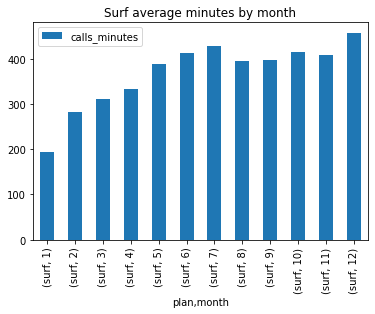

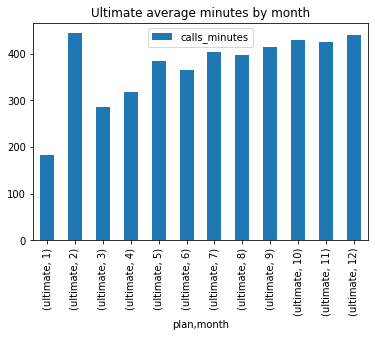

In [108]:
combined_data_with_plan_surf.pivot_table(index=['plan','month'],values='calls_minutes',aggfunc='mean').plot(kind='bar', title='Surf average minutes by month')
combined_data_with_plan_ultimate.pivot_table(index=['plan','month'],values='calls_minutes',aggfunc='mean').plot(kind='bar', title='Ultimate average minutes by month')

- Lo que observamos en las medias de minutos consumidos para los suscriptores de Surf es que a lo largo del año, el consumo va subiendo hasta la mitad del año donde parece estabilizarse alrededor de los 400 minutos mensuales, quizá porque van rastreando su consumo y saben cuando ya han consumido lo suficiente.
- En el caso de los suscriptores de ultimate, realmente no son usuarios tan diferentes en el consumo de minutos por mes, a pesar de que pudieran hacer más uso de ellos. Es posible que el uso de minutos en llamadas para este grupo de suscriptores no sea el atractivo principal del paquete que contrataron.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui bien! Genial que no olvides anadir los titulos a los graficos!

In [ ]:
# Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma.
#combined_data_with_plan_surf.pivot_table(index=['plan','month'],values='minutes',aggfunc='sum').plot(kind='bar', title='Surf total minutes by month')
#combined_data_with_plan_ultimate.pivot_table(index=['plan','month'],values='minutes',aggfunc='sum').plot(kind='bar', title='Ultimate total minutes by month')


- Considero que las gráficas de barras sobre la suma de minutos por mes nos indica la alta variación en el uso de ellos mes tras mes. A pesar de que el promedio mensual tiene una subida geométrica, el incremento de la suma total muestra más bien una subida exponencial en la cantidad de minutos utilizados colectivamente. Esto se debe al efecto combinado de las llamadas colectivas, aunque también indica que ala longitud de las llamadas son cada vez más grandes mes tras mes.

In [109]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print('Surf minutes mean:',combined_data_with_plan_surf['calls_minutes'].mean())
print('Surf minutes variance:',np.var(combined_data_with_plan_surf['calls_minutes']))
print()
print('Ultimate minutes mean:',combined_data_with_plan_ultimate['calls_minutes'].mean())
print('Ultimate minutes variance:',np.var(combined_data_with_plan_ultimate['calls_minutes']))

Surf minutes mean: 412.5948220064725
Surf minutes variance: 46972.581461861526

Ultimate minutes mean: 410.70126227208976
Ultimate minutes variance: 50446.41706713038


<AxesSubplot:title={'center':'calls_minutes'}, xlabel='month'>

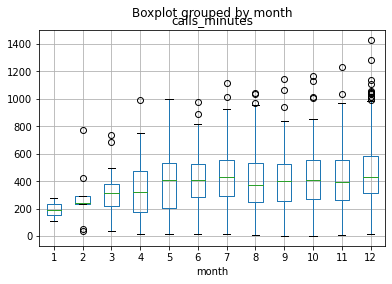

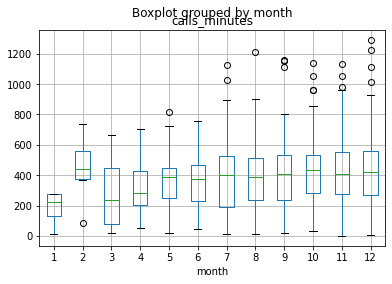

In [132]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
combined_data_with_plan_surf.boxplot(column='calls_minutes',by='month')
combined_data_with_plan_ultimate.boxplot(column='calls_minutes',by='month')

- Los usuarios de surf utilizan una cantidad de minutos mayor en promedio durante todos los meses. Con un incremento paulatino en la longitud de sus llamadas desde el mes 1 hasta llegar a un máximo en el mes 12.
- Los usuarios de ultimate utilizan una cantidad de minutos muy parecida a los de surf en todos los meses en promedio, sin embargo existen usuarios que utilizan una cantidad más alta de minutos en todos los meses de manera constante con un incremento a partir del mes 7 en adelante.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui correcto!

### Mensajes

In [111]:
combined_data_with_plan.groupby('plan')['messages'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1545.0,30.897735,33.644455,0.0,3.0,24.0,46.0,266.0
ultimate,713.0,37.725105,34.787116,0.0,7.0,30.0,61.0,166.0


<AxesSubplot:title={'center':'Ultimate average messages by month'}, xlabel='plan,month'>

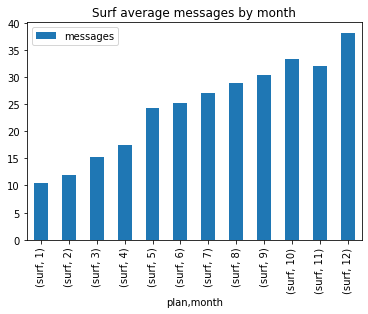

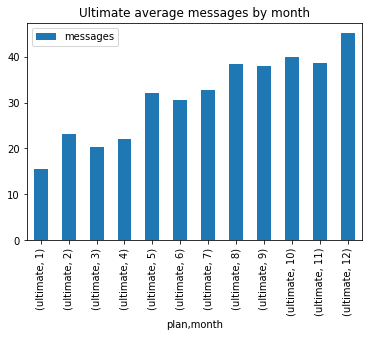

In [112]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
combined_data_with_plan_surf.pivot_table(index=['plan','month'],values='messages',aggfunc='mean').plot(kind='bar', title='Surf average messages by month')
combined_data_with_plan_ultimate.pivot_table(index=['plan','month'],values='messages',aggfunc='mean').plot(kind='bar', title='Ultimate average messages by month')

- El uso en el servicio de mensajería no difiere mucho entre usuarios de ambos planes, aunqe se sabe que en promedio ultimate consumo más mensajes que surf, lo cual es comprensible. Se observa un incremento paulatino mes tras mes en el uso de mensajes en ambos grupos para llegar a un máximo en el uso del servicio que ronda los 40 mensajes aunque nunca supera los 50.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Genial!

In [ ]:
#combined_data_with_plan_surf.pivot_table(index=['plan','month'],values='messages',aggfunc='sum').plot(kind='bar', title='Surf total messages by month')
#combined_data_with_plan_ultimate.pivot_table(index=['plan','month'],values='messages',aggfunc='sum').plot(kind='bar', title='Ultimate total messages by month')


<AxesSubplot:title={'center':'messages'}, xlabel='month'>

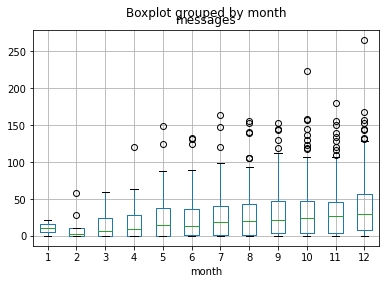

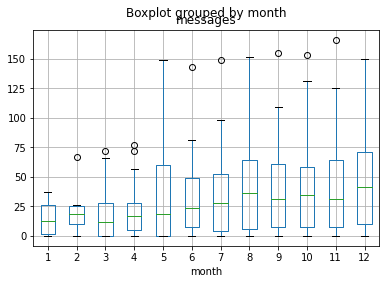

In [113]:
combined_data_with_plan_surf.boxplot(column='messages',by='month')
combined_data_with_plan_ultimate.boxplot(column='messages',by='month')

- Se observa que los usuarios de surf tienen una variación menor en el número de mensajes consumidos por mes a diferencia de ultimate quienes tienen usuarios que acumulan uso de mensajes por encima de los 50 desde el tercer mes del año. En ambos casos se puede observar que conforme avanza el año, el uso en la cantidad de mensahes tiende a subir también principalmente para los usuarios de ultimate.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Genial que no olvides sobre boxplot! Los cocnlusiones son correctos!

### Internet

In [114]:
combined_data_with_plan.groupby('plan')['gb_used'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1530.0,16.783007,7.546237,1.0,12.0,17.0,21.0,70.0
ultimate,713.0,17.370266,7.580120,1.0,13.0,17.0,21.0,46.0


<AxesSubplot:title={'center':'Ultimate average Gb by month'}, xlabel='plan,month'>

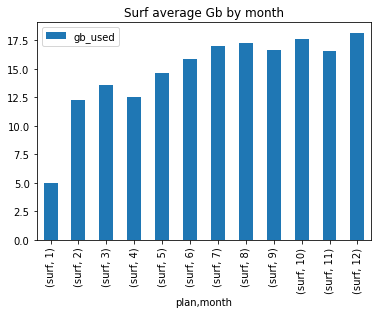

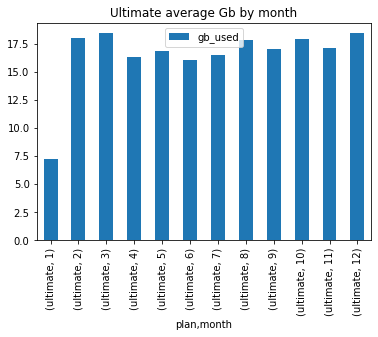

In [115]:
combined_data_with_plan_surf.pivot_table(index=['plan','month'],values='gb_used',aggfunc='mean').plot(kind='bar', title='Surf average Gb by month')
combined_data_with_plan_ultimate.pivot_table(index=['plan','month'],values='gb_used',aggfunc='mean').plot(kind='bar', title='Ultimate average Gb by month')

- Sorprendentemente, el promedio de uso de Gb por meses nuevamente similar entre ambos grupos de usuarios. 
- Los usuarios del paquete surf muestran un crecimiento promedio mes tras mes desde el primero hasta el último. Y en general, parece que agotan la cantidad de sus datos la mayoría del tiempo.
- Los usuarios del paquete ultimate son más constantes en el uso de datos mes tras mes, sin embargo al parecer nunca utilizan el paque en su totalidad. 

In [ ]:
#combined_data_with_plan_surf.pivot_table(index=['plan','month'],values='gb_used',aggfunc='sum').plot(kind='bar', title='Surf total Gb by month')
#combined_data_with_plan_ultimate.pivot_table(index=['plan','month'],values='gb_used',aggfunc='sum').plot(kind='bar', title='Ultimate total Gb by month')

<AxesSubplot:title={'center':'gb_used'}, xlabel='month'>

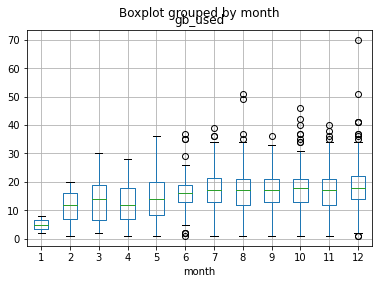

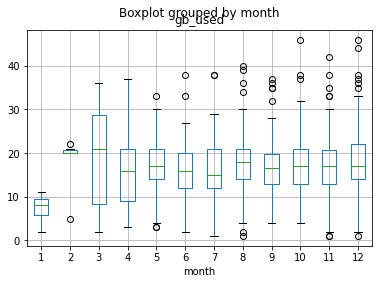

In [116]:
combined_data_with_plan_surf.boxplot(column='gb_used',by='month')
combined_data_with_plan_ultimate.boxplot(column='gb_used',by='month')

- Se observa que los usuarios de datos en el paquete surf, tienen menor variación en el uso de datos mes tras mes, asumo que se cuidan de no exceder el límite. Sin embargo tienden a exceder el límite máximo de 15Gb en casi todos los meses excepto el primero.
- Los usuarios de ultimate no usan mucho más datos en promedio, aunque el uso extremo de datos se mantiene más cerca del límite para su parquete de 30Gb lo cual los mantiene libres de las cuotas por uso adicional de datos. 

## Ingreso

In [117]:
combined_data_with_plan.groupby('plan')['total_fee'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1545.0,59.744252,53.398368,20.0,20.0,40.33,80.0,588.66
ultimate,713.0,72.277700,11.351942,70.0,70.0,70.00,70.0,182.00


[Del mismo modo en que has estudiado el comportamiento del usuario, es decir, estadísticamente, describe el ingreso entre los planes.]

<AxesSubplot:title={'center':'Ultimate average fee by month'}, xlabel='plan,month'>

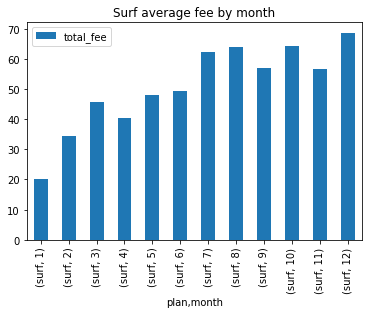

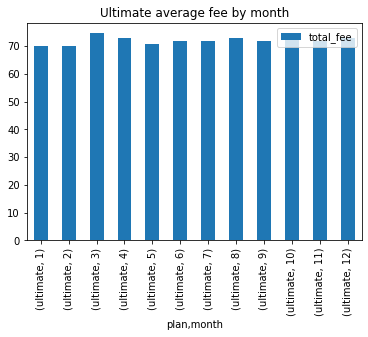

In [118]:
combined_data_with_plan_surf.pivot_table(index=['plan','month'],values='total_fee',aggfunc='mean').plot(kind='bar', title='Surf average fee by month')
combined_data_with_plan_ultimate.pivot_table(index=['plan','month'],values='total_fee',aggfunc='mean').plot(kind='bar', title='Ultimate average fee by month')

- Los usuarios de surf pagan en promedio más de la tarifa mensual del paqeute base y su variación en uso de servicios mes tras mes es tan alta que pueden llegar a consumir hasta 3 veces el costo de su paquete base.

- Los usuarios de ultimate rara vez pagan más allá de la cuota base de su paquete de telefonía, y en general. Y en general, tienen poca variación sobre la tarifa pagada al final del mes en cada uno de ellos.

In [ ]:
#combined_data_with_plan_surf.pivot_table(index=['plan','month'],values='total_fee',aggfunc='sum').plot(kind='bar', title='Surf total fee by month')
#combined_data_with_plan_ultimate.pivot_table(index=['plan','month'],values='total_fee',aggfunc='sum').plot(kind='bar', title='Ultimate total fee by month')

<AxesSubplot:title={'center':'total_fee'}, xlabel='month'>

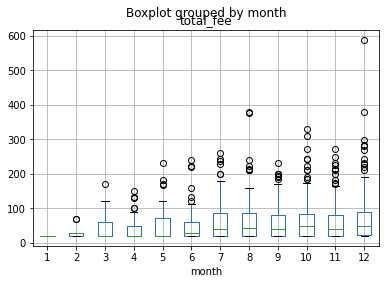

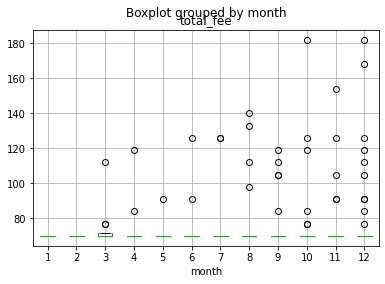

In [119]:
combined_data_with_plan_surf.boxplot(column='total_fee',by='month')
combined_data_with_plan_ultimate.boxplot(column='total_fee',by='month')

- Los ususarios de surf muestran un rango de dispersión muy alto, especialmente a partir del mes 3. en al menos el 50% de los casos los usuarios pagan más del costo base del paquete mes tras mes. Con situaciones exorbitantes de pago por encima de 200USD mensuales.
- Los usuarios de ultimate muestran una mediana controlada en 70USD con muy pocos casos aislados de pagos superiores, especialmente a partir del mes 3. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Aqui bien!

## Probar las hipótesis estadísticas.

***Hipótesis nula = las medias de ingreso de surf y ultimate son iguales***

In [120]:
print('tamaño de muestra de surf:',len(combined_data_with_plan_surf['total_fee']))
print('tamaño de muestra de ultimate:',len(combined_data_with_plan_ultimate['total_fee']))

tamaño de muestra de surf: 1545
tamaño de muestra de ultimate: 713


In [121]:
print(combined_data_with_plan_surf['total_fee'].mean())
print(combined_data_with_plan_ultimate['total_fee'].mean())

59.74425242718446
72.27769985974754


In [122]:
# Prueba las hipótesis
Surf = combined_data_with_plan_surf['total_fee']
Ultimate = combined_data_with_plan_ultimate['total_fee'].mean()
alpha = 0.5
results = st.ttest_1samp(Surf,Ultimate)
print('p_value',results.pvalue/2)

if (results.pvalue/2 < alpha) and (Surf.mean()<Ultimate):
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')


p_value 4.479152548995138e-20
Se rechaza la hipótesis nula


In [123]:
users_city = users_matrix.groupby('user_id')['city'].sum()
combined_data_with_city = combined_data_with_plan.join(users_city)
combined_data_with_city

calls_count  calls_minutes  messages  gb_used      plan  \
user_id month                                                            
1000    12              16          117.0      11.0      2.0  ultimate   
1001    8               27          172.0      30.0      7.0      surf   
        9               49          298.0      44.0     14.0      surf   
        10              65          375.0      53.0     22.0      surf   
        11              64          405.0      36.0     19.0      surf   
...                    ...            ...       ...      ...       ...   
1498    12              39          325.0       0.0     23.0      surf   
1499    9               41          331.0       0.0     13.0      surf   
        10              53          364.0       0.0     20.0      surf   
        11              45          289.0       0.0     17.0      surf   
        12              65          469.0       0.0     22.0      surf   

               total_fee                                       city  
user_id month                                                        
1000    12         70.00      Atlanta-Sandy Springs-Roswell, GA MSA  
1001    8          20.00            Seattle-Tacoma-Bellevue, WA MSA  
        9          20.00            Seattle-Tacoma-Bellevue, WA MSA  
        10         90.09            Seattle-Tacoma-Bellevue, WA MSA  
        11         60.00            Seattle-Tacoma-Bellevue, WA MSA  
...                  ...                                        ...  
1498    12        100.00  New York-Newark-Jersey City, NY-NJ-PA MSA  
1499    9          20.00          Orlando-Kissimmee-Sanford, FL MSA  
        10         70.00          Orlando-Kissimmee-Sanford, FL MSA  
        11         40.00          Orlando-Kissimmee-Sanford, FL MSA  
        12         90.00          Orlando-Kissimmee-Sanford, FL MSA  

[2258 rows x 7 columns]

***Hipótesis nula = las medias de ingreso de NY-NJ y el resto de los estados son iguales***

In [124]:
# Prueba las hipótesis
combined_data_with_city.groupby('city')['total_fee'].mean()

city
Albany-Schenectady-Troy, NY MSA                     147.794000
Albuquerque, NM MSA                                  67.530714
Atlanta-Sandy Springs-Roswell, GA MSA                75.138043
Austin-Round Rock-Georgetown, TX MSA                 56.290000
Bakersfield, CA MSA                                  48.750000
                                                       ...    
Tucson, AZ MSA                                       65.000000
Tulsa, OK MSA                                        75.393333
Urban Honolulu, HI MSA                              112.408095
Virginia Beach-Norfolk-Newport News, VA-NC MSA       65.000000
Washington-Arlington-Alexandria, DC-VA-MD-WV MSA     57.576290
Name: total_fee, Length: 73, dtype: float64

In [125]:
NY_NJ = combined_data_with_city[combined_data_with_city['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_fee']

In [126]:
All_Cities = combined_data_with_city['total_fee'].mean()

In [127]:
alpha = 0.5
results = st.ttest_1samp(NY_NJ,All_Cities)
print('p_value',results.pvalue)

if (results.pvalue < alpha):
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

print()
print('NY_NJ total_fee mean:', NY_NJ.mean())
print('All_Cities total_fee mean:', All_Cities)

p_value 0.02042598559353807
Se rechaza la hipótesis nula

NY_NJ total_fee mean: 58.55156334231806
All_Cities total_fee mean: 63.70189105403011


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones importantes (suposiciones) que tomaste y que te llevaron a procesar y analizar los datos del modo en que lo hiciste.]

- Los usuarios de surf pagan en promedio más de la tarifa mensual del paquete base y su variación en uso de servicios mes tras mes es tan alta que pueden llegar a consumir hasta 3 veces el costo de su paquete base. Su cuota promedio mensual es de 60USD con una desvisación estandar de hasta 53USD. Lo cual quiere decir que existen casos en los que se paga hasta 200USD mensuales.

- Los usuarios de ultimate rara vez pagan más allá de la cuota base de su paquete de telefonía, y en general tienen poca variación sobre la tarifa pagada al final del mes en cada uno de ellos. Su cuota promedio mensual es de 72USD con una desviación estandar de 11USD.

- Los ususarios de surf muestran un rango de dispersión muy alto, especialmente a partir del mes 3. En al menos el 50% de los casos los usuarios pagan más del costo base del paquete mes tras mes. 

- Los usuarios de ultimate muestran una mediana controlada en 70USD con muy pocos casos aislados de pagos superiores, especialmente a partir del mes 3. 

- La hipótesis nula = las medias de ingreso de surf y ultimate son iguales se ha rechazado lo que significa que la probabilidad de que se presente este caso de manera aleatoria es muy remota. E indica que de hecho existe una diferencia real entre el ingreso derivado de surf y el ingreso derivado de ultimate, siendo surf máspequeño que ultimate. Lo relevante es que las diferencias no son tan grandes como se espera al comparar las tarifas base. En este caso se realizó una prueba unilateral de una cola debido a que se buscaba solamente saber si surf es más pequeño que ultimate, y a que los tamaños de muestra son desiguales.

- La hipótesis nula = las medias de ingreso de NY-NJ y el resto de los estados son iguales se ha rechazado también. Lo que revela que en realidad existe una diferencia entre el ingreso derivado de NY-NJ y el promedio agregado de las otras ciudades. En este caso se realizó una prueba bilateral de una cola debido a que se buscaba saber si NY-NJ era diferente al promedio general, y a que los tamaños de muestra son desiguales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a> Muchas gracias por tu trabajo! El proyecto esta aceptado!